load 30m poliniex data

In [32]:
# plotting
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (11.5,6)
plt.style.use('ggplot')

# numeric
import quandl
import numpy as np
from numpy import random
import pandas as pd

import glob

from tqdm import tqdm_notebook as tqdm

import os, json

In [33]:
dfs=[]
for infile in glob.glob('./data/poliniex_teachmehowtotrade/*.csv'):
    df = pd.read_csv(infile)
    
    # date
    df.index=pd.to_datetime(df.date*1e9)
    del df['date']
    df=df.resample('30T').first()
    
    # name cols
    name = os.path.splitext(os.path.basename(infile))[0]
#     df.columns = ['%s|%s'%(name,col) for col in df.columns]
    df.name=name
    
    dfs.append(df)

In [34]:
# sort
dfs.sort(key=lambda x:len(x), reverse=True)

In [35]:
# insert a fake one, the null asset
df=dfs[0].copy()
df[:]=1
df.name='BTCBTC'
dfs.insert(0,df)

In [41]:
# crop to ones with more data
dfs1= [df for df in dfs if df.index.min()<pd.Timestamp('2015-06-01')]

# also only ones that are in BTC
dfs1= [df for df in dfs1 if df.name.endswith('BTC')]
[str(min(df.index)) for df in dfs1]

['2014-01-18 04:00:00',
 '2014-01-18 04:00:00',
 '2014-01-18 04:00:00',
 '2014-01-18 04:00:00',
 '2014-01-18 04:00:00',
 '2014-01-18 04:00:00']

In [42]:
# reindex
mi = dfs1[0].index
for i in range(len(dfs1)):
    df = dfs1[i]
    dfs[i]=df.reindex(mi, method='pad')
    dfs[i][np.isnan(dfs[i])]  =0
    dfs[i].name = df.name

In [43]:
# concat
df = pd.concat(dfs1, axis=1, keys=[df.name for df in dfs1], names=['Pair','Price'])
# df[np.isnan(df)]=0
df

Pair                BTCBTC                                                     \
Price                 high  low open close volume quoteVolume weightedAverage   
date                                                                            
2014-01-18 04:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 04:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 05:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 05:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 06:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 06:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 07:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 07:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 08:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 08:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 09:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 09:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 10:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 10:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 11:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 11:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 12:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 12:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 13:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 13:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 14:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 14:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 15:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 15:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 16:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 16:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 17:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 17:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 18:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 18:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
...                    ...  ...  ...   ...    ...         ...             ...   
2017-07-13 09:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 09:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 10:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 10:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 11:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 11:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 12:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 12:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 13:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 13:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 14:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 14:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 15:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 15:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 16:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 16:30:00    1.0  1.0

In [8]:
# matrix=np.stack(dfs)
# matrix.shape

In [44]:
df.columns.levels[0]

Index(['BTCBTC', 'LTCBTC', 'DOGEBTC', 'DASHBTC', 'XMRBTC', 'XRPBTC'], dtype='object', name='Pair')

In [45]:
# # crop to main ts
# main_ts = dfs[0]
# t0=main_ts.index.min()
# t1=main_ts.index.max()
# df = df[(df.index>=t0) * (df.index<=t1)]

In [46]:
# fill in na's
df = df.fillna(method="pad")

# replace rest
df.replace(np.nan, 0, inplace=True)
# df.unstack()
df

Pair                BTCBTC                                                     \
Price                 high  low open close volume quoteVolume weightedAverage   
date                                                                            
2014-01-18 04:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 04:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 05:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 05:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 06:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 06:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 07:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 07:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 08:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 08:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 09:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 09:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 10:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 10:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 11:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 11:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 12:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 12:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 13:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 13:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 14:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 14:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 15:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 15:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 16:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 16:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 17:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 17:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 18:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 18:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
...                    ...  ...  ...   ...    ...         ...             ...   
2017-07-13 09:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 09:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 10:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 10:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 11:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 11:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 12:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 12:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 13:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 13:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 14:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 14:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 15:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 15:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 16:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 16:30:00    1.0  1.0

In [47]:
# df.iloc[0]
# df=df.stack().unstack()
df

Pair                BTCBTC                                                     \
Price                 high  low open close volume quoteVolume weightedAverage   
date                                                                            
2014-01-18 04:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 04:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 05:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 05:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 06:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 06:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 07:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 07:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 08:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 08:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 09:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 09:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 10:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 10:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 11:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 11:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 12:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 12:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 13:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 13:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 14:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 14:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 15:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 15:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 16:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 16:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 17:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 17:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 18:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 18:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
...                    ...  ...  ...   ...    ...         ...             ...   
2017-07-13 09:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 09:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 10:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 10:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 11:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 11:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 12:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 12:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 13:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 13:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 14:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 14:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 15:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 15:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 16:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-07-13 16:30:00    1.0  1.0

In [48]:
test_split=0.15
c=int(len(df.index)*test_split)
split_time = df.index[-c]


df_test = df[df.index>split_time]
df_train = df[df.index<=split_time]
print('test#:',len(df_test), 'train#:',len(df_train), 'test_frac:', len(df_test)/len(df), 'cutoff_time:',split_time)

test#: 9163 train#: 51933 test_frac: 0.14997708524289644 cutoff_time: 2017-01-04 02:00:00


In [49]:
df.columns.levels[0].tolist()

['BTCBTC', 'LTCBTC', 'DOGEBTC', 'DASHBTC', 'XMRBTC', 'XRPBTC']

In [50]:
df.columns

MultiIndex(levels=[['BTCBTC', 'LTCBTC', 'DOGEBTC', 'DASHBTC', 'XMRBTC', 'XRPBTC'], ['high', 'low', 'open', 'close', 'volume', 'quoteVolume', 'weightedAverage']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5], [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6]],
           names=['Pair', 'Price'])

In [51]:
df_train.to_hdf('./data/poliniex_30m.hf',key='train')
df_test.to_hdf('./data/poliniex_30m.hf',key='test')
df_train

Pair                BTCBTC                                                     \
Price                 high  low open close volume quoteVolume weightedAverage   
date                                                                            
2014-01-18 04:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 04:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 05:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 05:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 06:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 06:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 07:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 07:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 08:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 08:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 09:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 09:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 10:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 10:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 11:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 11:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 12:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 12:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 13:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 13:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 14:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 14:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 15:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 15:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 16:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 16:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 17:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 17:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 18:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2014-01-18 18:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
...                    ...  ...  ...   ...    ...         ...             ...   
2017-01-03 11:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-01-03 12:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-01-03 12:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-01-03 13:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-01-03 13:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-01-03 14:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-01-03 14:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-01-03 15:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-01-03 15:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-01-03 16:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-01-03 16:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-01-03 17:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-01-03 17:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-01-03 18:00:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-01-03 18:30:00    1.0  1.0  1.0   1.0    1.0         1.0             1.0   
2017-01-03 19:00:00    1.0  1.0

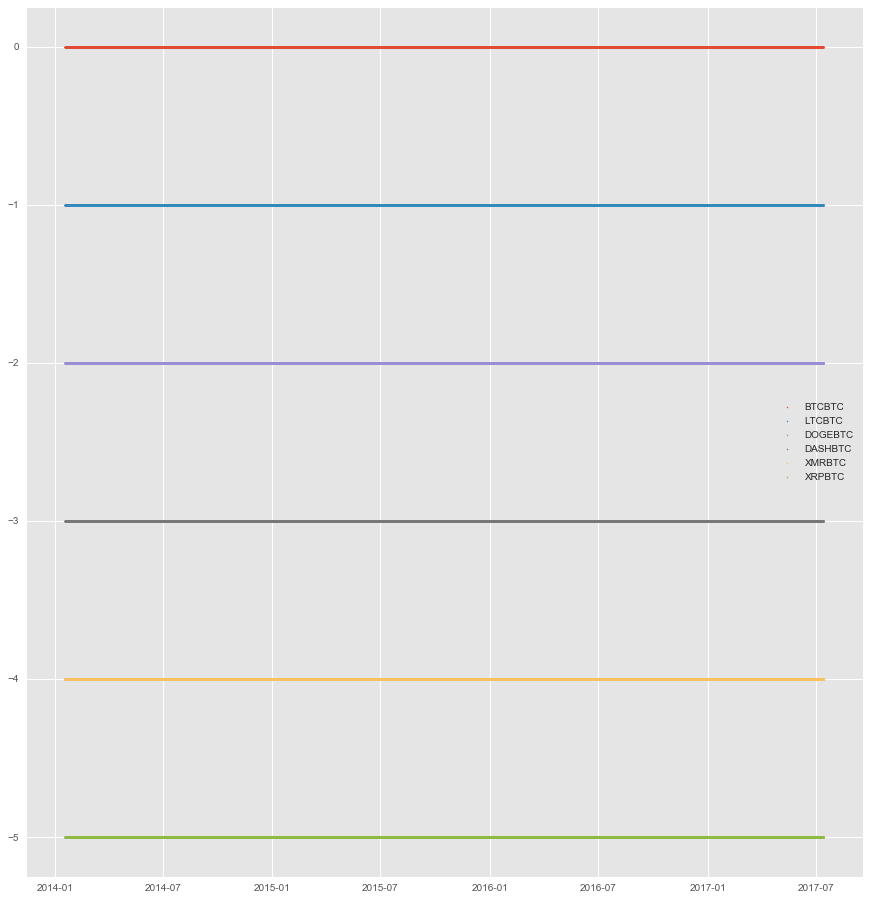

In [54]:
# view timeseries
plt.figure(figsize=(15,16))
for i, d in enumerate(dfs1):
    name = d.name
    x=d.dropna().index
    y=[-i]*len(x)
    plt.scatter(x,y,label=name[:20], s=1)
plt.legend()